# Data Analysis of office location preferences at M.N. Dastur &Co.

## Table of contents

1.	Introduction

2.	Data Exploration


3.	Methodology

•	EDA (Exploratory Data Analysis)

•	Clustering


4.	Results


5.	Discussion

6.	Conclusion



## Introduction:   (Assignment Week 4 - part 1- Introduction)
### Background to the business model problem choice:
### I am a metallurgical engineer at IIT Bombay and having done my internship at a metallurgical consultancy firm named M.N. Dastur I had the opportunity of spending a large amount of time at the organization with its offices ranging throughout the world, mainly concentrated in India.

### Being a consultancy company based on the eastern coalfield belt of India they have taken an approach of creating a local community of companies together coming up with the solutions of certain complex metallurgical problems. The main approach is creating independent spaces for the companies to work in unison alongside each other.

### On this basis I’ve decided to focus my project on M.N. Dastur office locations in Kolkata from where the company is headquartered. And thus, on this basis a locational data analysis of the offices for future expansion of the organization has been studied through this project


## Business Problem:
###  As a reputed consultancy firm in the field of steel market, the company established din 1965 has worked extensively with Indian as well as with many foreign steel plants They are now diversifying their field of interest and thus moving into the oil and gas and synthetic product market and are focusing on dedicating teams with exclusive offices for venturing into the diverse fields. 

## The question we aim, to answer through this project:

### On the assumption that the current 6 offices operating in Kolkata with one being the headquarters are well established and successful with over half a decade of working experience, what factors are common between them and thus linking the offices situated in the city and could thus be informative for setting up of future offices in the city. That is what is a particular type of neighborhood that is suited for the employees of the organization in this region of the country that should be focused on further expansion.


## Interest:
### The target audience for this project is the board of directors of M.N. Dastur company who are planning on the expansion of the organization in the near future. Using this data, the organization could have a way forward in exploration of future locations for their offices based on the previous successes in the certain neighborhoods in this regional spac

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from urllib.request import urlopen
from bs4 import BeautifulSoup

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from tqdm import tqdm
tqdm.pandas()

import requests
import folium
from folium.plugins import HeatMap

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans
print ('libraries imported')

C:\ProgramData\Anaconda3\lib\site-packages\tqdm\std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
Matplotlib is building the font cache; this may take a moment.


libraries imported


## Data Exploration:      (Assignment Week 4 - part 2 - Data)


### The data of the current offices of the M.N. Dastur organization is taken and explored for deriving certain locational features for future expansion
### The data will be explored by a clustering of neighborhood characteristics of the current locations of offices of M.N. Dastur In Kolkata by the k means clustering algorithm.

## The present Dataset:
### •	Where are the current offices of the organization spread at a global level, inside India and lastly within the city of Kolkata. We take the data from their current website: http://www.dastur.com/content-59-Dastur-Offices and then perform the following operations:
### 	Scrape the city names from the webpage mentioned above using Beautiful Soup
### 	Find the latitude and longitude of all the locations using Goopy.
### 	Plot the map of the scrapped locations using Folium.


In [4]:
url = "http://www.dastur.com/content-59-Dastur-Offices"
html = urlopen(url)
soup = BeautifulSoup(html, 'html')
#print(soup.prettify())

In [5]:
x= soup.find_all('table',class_='divisionTable')
#y=x.find_all('strong')
print(x)



[<table border="0" cellpadding="0" cellspacing="0" class="divisionTable" width="100%">
<tbody>
<tr>
<td width="50%"><strong>M. N. Dastur &amp; Company (P) Ltd.</strong><br/>
<em>Consulting Engineers</em><br/>
Faraday House<br/>
P-17 Mission Row Extension<br/>
Kolkata 700 013<br/>
West Bengal :: India<br/>
Ph : +91 33 2225 5420 / 0500<br/>
Fax : +91 33 2225 1422 / 7101<br/>
E-mail: <a href="mailto:kolkata@dastur.com" shape="rect">kolkata@dastur.com</a></td>
<td width="50%"><strong>Dastur Business &amp; Technology Consulting</strong><br/>
7Bi RDB Boulevard, Plot K1,  Block EP &amp; GP<br/>
Sector V, Salt Lake City<br/>
Kolkata 700091<br/>
Ph  : +91 33 4021 3100<br/>
Fax : +91 33 4021 3200<br/>
E-mail: <a href="mailto:dbtc@dastur.com" shape="rect">dbtc@dastur.com</a></td></tr>
<tr>
<td width="50%"><strong>Toronto</strong><br/>
Dastur Innovation Labs<br/>
250 Yonge Street, Suite 2201 (22nd Floor)<br/>
Toronto, ON M5B 2L7 :: Canada<br/>
Ph  : +(1) - 647-6-DASTUR<br/>
          (+1 - 647-632

### Getting data via Geopy


In [7]:
cities_array =pd.read_csv("dco.csv")
cities_array
print('Number of cities with offices today: ',len(cities_array))

Number of cities with offices today:  7


In [8]:
geolocator = Nominatim(user_agent="office_locations")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
# df_cities['location'] = df_cities['Name'].apply(geocode)
cities_array['location'] = cities_array['Cities'].progress_apply(geocode) # As above but shows progress bar
cities_array['latlong'] = cities_array['location'].apply(lambda x: tuple(x.point) if x else None)

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:09<00:00,  1.31s/it]


In [9]:
cities_array.to_csv('cities.csv')

In [10]:
df_cities = pd.DataFrame()
df_cities = pd.read_csv('cities.csv', index_col=0) # For subsequent use, reading the data from the local CSV file
df_cities = df_cities.dropna()
df_cities

,Cities,location,latlong
0,Kolkata,"Kolkata, Howrah, West Bengal, India","(22.5414185, 88.35769124388872, 0.0)"
1,Bengaluru,"Bengaluru, Bangalore North, Bangalore Urban, K...","(12.9791198, 77.5912997, 0.0)"
2,Bhubaneswar,"Bhubaneswar, Master Canteen Chowk, Ward 41, So...","(20.2667774, 85.8435592, 0.0)"
3,Chennai,"Chennai, Chennai District, Tamil Nadu, India","(13.0836939, 80.270186, 0.0)"
4,Hyderabad,"Hyderabad, Bahadurpura mandal, Hyderabad, Tela...","(17.360589, 78.4740613, 0.0)"
5,Mumbai,"Mumbai, Mumbai Suburban, Maharashtra, India","(19.0759899, 72.8773928, 0.0)"
6,New Delhi,"New Delhi, Delhi, India","(28.6138954, 77.2090057, 0.0)"


### Mapping

In [48]:
map_world = folium.Map(location=[30, 0], zoom_start=1.5)

for latlng, city in zip(df_cities['latlong'], 
                          df_cities['Cities']):

    if type(latlng) != tuple:  # Need this scenario when latlong is from csv and hence not a tuple!
        latlng = list(map(float,latlng.strip('()').split(',')))
    
    label = '{}'.format(city)
    label = folium.Popup(label, parse_html=True)
    if latlng != None:
            folium.CircleMarker(
            [latlng[0], latlng[1]],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map_world)  
    
map_world

## The present Dataset:
### •	Where are the current offices of the organization spread at a global level, inside India and lastly within the city of Kolkata. We take the data from their current website: http://www.dastur.com/content-59-Dastur-Offices and then perform the following operations:
### 	Scrape the city names from the webpage mentioned above using Beautiful Soup
### 	Find the latitude and longitude of all the locations using Goopy.
### 	Plot the map of the scrapped locations using Folium


In [12]:
Kolkata_array  =pd.read_csv("dcok.csv")
Kolkata_array
print('Number of cities with offices today: ',len(Kolkata_array))

Kolkata_array.head()

Number of cities with offices today:  7


,Name,Postcode
0,Chandni chowk,700013
1,RNM Avenue,700001
2,Salt Lake,700091
3,Shyambazar,700004
4,Tollygunge,700033


In [13]:
geocode2 = RateLimiter(geolocator.geocode, min_delay_seconds=1)
Kolkata_array['location'] = Kolkata_array['Postcode'].progress_apply(geocode2) # Shows progress bar
Kolkata_array['latlong'] = Kolkata_array['location'].apply(lambda x: tuple(x.point) if x else None)

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:07<00:00,  1.08s/it]


In [14]:
Kolkata_array

,Name,Postcode,location,latlong
0,Chandni chowk,700013,"(Kolkata, West Bengal, 700013, India, (22.5640...","(22.564069099999998, 88.35876610000001, 0.0)"
1,RNM Avenue,700001,"(Kolkata, West Bengal, 700001, India, (22.5550...","(22.555015372229352, 88.35268535053916, 0.0)"
2,Salt Lake,700091,"(Bhangar - II, South 24 Parganas, West Bengal,...","(22.576516226030165, 88.4296681726147, 0.0)"
3,Shyambazar,700004,"(南區, 鹽埕, 臺南市, 700004, 臺灣, (22.9882648, 120.191...","(22.9882648, 120.19136904999999, 0.0)"
4,Tollygunge,700033,"(Kolkata, West Bengal, 700033, India, (22.5107...","(22.510736550691504, 88.34947522969885, 0.0)"
5,Birati,700049,"(Barrackpur - II, North 24 Parganas, West Beng...","(22.65108445, 88.39404490000003, 0.0)"
6,Jadavpur,700075,"(Kolkata, West Bengal, 700075, India, (22.4774...","(22.47743735072909, 88.39299664938827, 0.0)"


In [15]:
Kolkata_array.to_csv('kolkata.csv') # Save the data to a local CSV file if required since Geopy can be intermittent!


In [16]:
df_Kolkata = pd.DataFrame()
df_Kolkata = pd.read_csv('kolkata.csv', index_col=0) # For subsequent use, reading the data from the local CSV file
df_Kolkata.reset_index(inplace=True, drop=True)
df_Kolkata.tail()

,Name,Postcode,location,latlong
2,Salt Lake,700091,"Bhangar - II, South 24 Parganas, West Bengal, ...","(22.576516226030165, 88.4296681726147, 0.0)"
3,Shyambazar,700004,"南區, 鹽埕, 臺南市, 700004, 臺灣","(22.9882648, 120.19136904999999, 0.0)"
4,Tollygunge,700033,"Kolkata, West Bengal, 700033, India","(22.510736550691504, 88.34947522969885, 0.0)"
5,Birati,700049,"Barrackpur - II, North 24 Parganas, West Benga...","(22.65108445, 88.39404490000003, 0.0)"
6,Jadavpur,700075,"Kolkata, West Bengal, 700075, India","(22.47743735072909, 88.39299664938827, 0.0)"


In [18]:
kolkata_lat = 22.5414185
kolkata_long = 88.35769124388872

### Mapping

In [19]:
map_kolkata = folium.Map(location=[kolkata_lat, kolkata_long], zoom_start=12)

for latlng, office in zip(df_Kolkata['latlong'], 
                          df_Kolkata['Name']):
    
    if type(latlng) != tuple:  # Need this scenario when latlong is from csv and hence not a tuple!
        latlng = list(map(float,latlng.strip('()').split(',')))
    
    label = '{}'.format(office)
    label = folium.Popup(label, parse_html=True)
    if latlng != None:
            folium.CircleMarker(
            [latlng[0], latlng[1]],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map_kolkata)  
    
map_kolkata

### Foursquare data for each office:
### The final data set to be gathered is using Foursquare to provide data for the immediate vicinity for each of the 6 offices of interest in Kolkata.
###  In this section we find up 100 venues in the 400m closest to the offices listed in Kolkata. The final output is a Data Frame containing these details which can then be used for clustering in the next step of data analysis (out of scope for this week's assignment.
### The steps followed are the following:
### •	Using the latitude and longitude found in the previous section, query Foursquare using the explore API to find up to 100 local popular venues.
 ### •	Group the data produced by office name and shape using one hot encoding.
### •	Find the 10 most common venues for each office and create a final DataFrame with this data for analysis


In [20]:
CLIENT_ID = 'WKLSPFMH2ZRGTQH0LFB10XJ2WEM0F40VZMMOVR2KNXZJD1RN' # your Foursquare ID
CLIENT_SECRET = 'GZ3QSTBHLB12H2K0QQDECATF1AJ3FCX1BCMQQTA3L5JUEEQS' # your Foursquare Secret
VERSION = '20180604' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WKLSPFMH2ZRGTQH0LFB10XJ2WEM0F40VZMMOVR2KNXZJD1RN
CLIENT_SECRET:GZ3QSTBHLB12H2K0QQDECATF1AJ3FCX1BCMQQTA3L5JUEEQS


In [22]:
# function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [23]:
# function that gets nearby venues

def getNearbyVenues(names, latlong, radius=400):
    LIMIT = 100
    
    venues_list=[]
    for name, latlng in zip(names, latlong):
        
        if type(latlng) != tuple:  # Need this scenario when latlong is from csv and hence not a tuple!
            latlng = list(map(float,latlng.strip('()').split(',')))
        
        print(name, list(latlng)[0], list(latlng)[1])
        lat = list(latlng)[0]
        lng = list(latlng)[1]
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Office Name', 
                  'Office Latitude', 
                  'Office Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [24]:

kolkata_venues = getNearbyVenues(names=df_Kolkata['Name'],
                                latlong=df_Kolkata['latlong']
                                )
kolkata_venues


Chandni chowk 22.564069099999998 88.35876610000001
RNM Avenue 22.555015372229352 88.35268535053916
Salt Lake 22.576516226030165 88.4296681726147
Shyambazar 22.9882648 120.19136904999999
Tollygunge 22.510736550691504 88.34947522969885
Birati 22.65108445 88.39404490000003
Jadavpur 22.47743735072909 88.39299664938827


,Office Name,Office Latitude,Office Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Chandni chowk,22.564069,88.358766,Hind INOX,22.564914,88.359152,Multiplex
1,Chandni chowk,22.564069,88.358766,Wellington Square,22.563509,88.357525,Park
2,Chandni chowk,22.564069,88.358766,Axis Bank ATM,22.566237,88.358290,ATM
3,Chandni chowk,22.564069,88.358766,Don Giovanni's,22.562654,88.361868,Pizza Place
4,Chandni chowk,22.564069,88.358766,Taltala baazar,22.560666,88.358255,Farmers Market
5,RNM Avenue,22.555015,88.352685,Arsalan,22.553897,88.354063,Mughlai Restaurant
6,RNM Avenue,22.555015,88.352685,Aqua,22.554734,88.352180,Lounge
7,RNM Avenue,22.555015,88.352685,Trincas Tavern,22.553882,88.351506,Indian Restaurant
8,RNM Avenue,22.555015,88.352685,Mocambo,22.553206,88.353296,Restaurant
9,RNM Avenue,22.555015,88.352685,Bar-B-Q,22.553125,88.352625,BBQ Joint


In [25]:
print(kolkata_venues.shape)
print('There are {} unique categories within this data for London.'.format(len(kolkata_venues['Venue Category'].unique())))

(61, 7)
There are 37 unique categories within this data for London.


In [26]:
kolkata_venues.groupby('Office Name').count()


,Office Latitude,Office Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Office Name,,,,,,
Chandni chowk,5,5,5,5,5,5
Jadavpur,1,1,1,1,1,1
RNM Avenue,42,42,42,42,42,42
Salt Lake,6,6,6,6,6,6
Shyambazar,6,6,6,6,6,6
Tollygunge,1,1,1,1,1,1


In [27]:
# one hot encoding
kolkata_onehot = pd.get_dummies(kolkata_venues[['Venue Category']], prefix="", prefix_sep="")

# add office name column back to dataframe
kolkata_onehot['Office Name'] = kolkata_venues['Office Name'] 

# move neighborhood column to the first column
fixed_columns = [kolkata_onehot.columns[-1]] + list(kolkata_onehot.columns[:-1])
kolkata_onehot = kolkata_onehot[fixed_columns]

print('Shape is:', kolkata_onehot.shape)
kolkata_onehot


Shape is: (61, 38)


,Office Name,ATM,Asian Restaurant,BBQ Joint,Bakery,Beer Garden,Bengali Restaurant,Bookstore,Café,Chinese Restaurant,Coffee Shop,Dhaba,Electronics Store,Farmers Market,Fast Food Restaurant,Grocery Store,Hotel,IT Services,Indian Restaurant,Japanese Restaurant,Lounge,Mobile Phone Shop,Movie Theater,Mughlai Restaurant,Multiplex,Museum,Nightclub,Noodle House,North Indian Restaurant,Park,Pizza Place,Pub,Restaurant,Snack Place,Soup Place,Steakhouse,Taiwanese Restaurant,Tea Room
0,Chandni chowk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Chandni chowk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,Chandni chowk,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Chandni chowk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Chandni chowk,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,RNM Avenue,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,RNM Avenue,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,RNM Avenue,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,RNM Avenue,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9,RNM Avenue,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
kolkata_grouped = kolkata_onehot.groupby('Office Name').mean().reset_index()
print('Shape is:', kolkata_grouped.shape)
kolkata_grouped.head()

Shape is: (6, 38)


,Office Name,ATM,Asian Restaurant,BBQ Joint,Bakery,Beer Garden,Bengali Restaurant,Bookstore,Café,Chinese Restaurant,Coffee Shop,Dhaba,Electronics Store,Farmers Market,Fast Food Restaurant,Grocery Store,Hotel,IT Services,Indian Restaurant,Japanese Restaurant,Lounge,Mobile Phone Shop,Movie Theater,Mughlai Restaurant,Multiplex,Museum,Nightclub,Noodle House,North Indian Restaurant,Park,Pizza Place,Pub,Restaurant,Snack Place,Soup Place,Steakhouse,Taiwanese Restaurant,Tea Room
0,Chandni chowk,0.2,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.2,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.0,0.00000,0.2,0.00000,0.000000,0.000000,0.000000,0.200000,0.200000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000
1,Jadavpur,0.0,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,1.00000,0.00000,0.000000,0.00000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.0,0.00000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000
2,RNM Avenue,0.0,0.023810,0.02381,0.02381,0.02381,0.02381,0.02381,0.119048,0.02381,0.02381,0.000000,0.02381,0.0,0.047619,0.02381,0.071429,0.000000,0.071429,0.02381,0.02381,0.02381,0.0,0.02381,0.0,0.02381,0.071429,0.000000,0.000000,0.000000,0.047619,0.047619,0.095238,0.02381,0.000000,0.02381,0.000000,0.02381
3,Salt Lake,0.0,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.166667,0.00000,0.0,0.000000,0.00000,0.166667,0.333333,0.000000,0.00000,0.00000,0.00000,0.0,0.00000,0.0,0.00000,0.000000,0.000000,0.166667,0.000000,0.166667,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000
4,Shyambazar,0.0,0.166667,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.0,0.00000,0.0,0.00000,0.000000,0.166667,0.000000,0.166667,0.000000,0.000000,0.000000,0.00000,0.166667,0.00000,0.333333,0.00000


In [30]:
#  Function to return most common venues

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [32]:

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Office Name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Office Name'] = kolkata_grouped['Office Name']

for ind in np.arange(kolkata_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(kolkata_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Office Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chandni chowk,ATM,Farmers Market,Pizza Place,Park,Multiplex,Chinese Restaurant,Grocery Store,Fast Food Restaurant,Electronics Store,Dhaba
1,Jadavpur,Chinese Restaurant,Indian Restaurant,Hotel,Grocery Store,Fast Food Restaurant,Farmers Market,Electronics Store,Dhaba,Coffee Shop,Tea Room
2,RNM Avenue,Café,Restaurant,Hotel,Indian Restaurant,Nightclub,Fast Food Restaurant,Pub,Pizza Place,Grocery Store,Electronics Store
3,Salt Lake,IT Services,North Indian Restaurant,Pizza Place,Dhaba,Hotel,Beer Garden,Bengali Restaurant,Bakery,Bookstore,BBQ Joint
4,Shyambazar,Taiwanese Restaurant,Noodle House,Asian Restaurant,Soup Place,Park,Chinese Restaurant,Fast Food Restaurant,Farmers Market,Electronics Store,Dhaba
5,Tollygunge,Movie Theater,Tea Room,Coffee Shop,Hotel,Grocery Store,Fast Food Restaurant,Farmers Market,Electronics Store,Dhaba,Chinese Restaurant


In [33]:
neighborhoods_venues_sorted.to_csv('neighborhoods_venues_sorted.csv')

## Data Summary

In [34]:
print('Data for all M.N.Dastur locations, with {} offices in Kolkata found.'.format(len(df_Kolkata)))
df_Kolkata.head()

Data for all M.N.Dastur locations, with 7 offices in Kolkata found.


,Name,Postcode,location,latlong
0,Chandni chowk,700013,"Kolkata, West Bengal, 700013, India","(22.564069099999998, 88.35876610000001, 0.0)"
1,RNM Avenue,700001,"Kolkata, West Bengal, 700001, India","(22.555015372229352, 88.35268535053916, 0.0)"
2,Salt Lake,700091,"Bhangar - II, South 24 Parganas, West Bengal, ...","(22.576516226030165, 88.4296681726147, 0.0)"
3,Shyambazar,700004,"南區, 鹽埕, 臺南市, 700004, 臺灣","(22.9882648, 120.19136904999999, 0.0)"
4,Tollygunge,700033,"Kolkata, West Bengal, 700033, India","(22.510736550691504, 88.34947522969885, 0.0)"


In [35]:
print('Data for the 10 most common venues for each London office, with {} venue categories seen in total.'.format(len(kolkata_venues['Venue Category'].unique())))
neighborhoods_venues_sorted

Data for the 10 most common venues for each London office, with 37 venue categories seen in total.


,Office Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chandni chowk,ATM,Farmers Market,Pizza Place,Park,Multiplex,Chinese Restaurant,Grocery Store,Fast Food Restaurant,Electronics Store,Dhaba
1,Jadavpur,Chinese Restaurant,Indian Restaurant,Hotel,Grocery Store,Fast Food Restaurant,Farmers Market,Electronics Store,Dhaba,Coffee Shop,Tea Room
2,RNM Avenue,Café,Restaurant,Hotel,Indian Restaurant,Nightclub,Fast Food Restaurant,Pub,Pizza Place,Grocery Store,Electronics Store
3,Salt Lake,IT Services,North Indian Restaurant,Pizza Place,Dhaba,Hotel,Beer Garden,Bengali Restaurant,Bakery,Bookstore,BBQ Joint
4,Shyambazar,Taiwanese Restaurant,Noodle House,Asian Restaurant,Soup Place,Park,Chinese Restaurant,Fast Food Restaurant,Farmers Market,Electronics Store,Dhaba
5,Tollygunge,Movie Theater,Tea Room,Coffee Shop,Hotel,Grocery Store,Fast Food Restaurant,Farmers Market,Electronics Store,Dhaba,Chinese Restaurant


### Methodology :  (Week 5- Continuation)
### For this project we will use the following methodology:
### •	Data has been collected from the M.N.Dastur  website for Kolkata based offices and exact locations added
### •	The areas around each office will be characterised using data from Foursquare for venue types in a 400m radius around each. This radius was chosen as the “ ped shed " which is deemed as equivalent to 5 mins walk.
### •	The data will be explored using heatmapping and K-means clustering in order to find similarities between the localities of the various M.N.Dastur offices in Kolkata.


## Data Exploration

In [36]:
heat_data = df_Kolkata['latlong'].apply(lambda x: list(map(float,x.strip('()').split(',')))[0:2])

# create map
map_heat = folium.Map(location=[kolkata_lat, kolkata_long], zoom_start=12)

HeatMap(heat_data).add_to(map_heat)

map_heat

### `After performing of the heat map, it can be seen that there are hotspots in the southern area of Kolkata namely the areas near Chandni chowk to Rabindra sadan within which we can see the technological hub area of park street and esplanade all the way up to tollygunge.

## Clustering

### Finding out the number of clusters

In [38]:
Sum_of_squared_distances = []
K = range(1,6)
for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(kolkata_grouped.drop('Office Name', 1))
    Sum_of_squared_distances.append(km.inertia_)

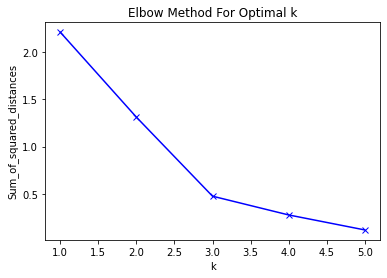

In [39]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [40]:
# set number of clusters
kclusters = 3

kolkata_grouped_clustering = kolkata_grouped.drop('Office Name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kolkata_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:len(kolkata_grouped)]

array([0, 1, 0, 0, 0, 2])

In [41]:
neighborhoods_venues_sorted.head()

,Office Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chandni chowk,ATM,Farmers Market,Pizza Place,Park,Multiplex,Chinese Restaurant,Grocery Store,Fast Food Restaurant,Electronics Store,Dhaba
1,Jadavpur,Chinese Restaurant,Indian Restaurant,Hotel,Grocery Store,Fast Food Restaurant,Farmers Market,Electronics Store,Dhaba,Coffee Shop,Tea Room
2,RNM Avenue,Café,Restaurant,Hotel,Indian Restaurant,Nightclub,Fast Food Restaurant,Pub,Pizza Place,Grocery Store,Electronics Store
3,Salt Lake,IT Services,North Indian Restaurant,Pizza Place,Dhaba,Hotel,Beer Garden,Bengali Restaurant,Bakery,Bookstore,BBQ Joint
4,Shyambazar,Taiwanese Restaurant,Noodle House,Asian Restaurant,Soup Place,Park,Chinese Restaurant,Fast Food Restaurant,Farmers Market,Electronics Store,Dhaba


In [42]:
# add clustering labels
try:
    neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
except: # for scenario where we are rerunning this and the column already exists
    neighborhoods_venues_sorted.drop(columns='Cluster Labels', inplace=True) 
    neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

kolkata_merged = df_Kolkata
kolkata_merged = kolkata_merged.join(neighborhoods_venues_sorted.set_index('Office Name'), on='Name')

kolkata_merged.head()

,Name,Postcode,location,latlong,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chandni chowk,700013,"Kolkata, West Bengal, 700013, India","(22.564069099999998, 88.35876610000001, 0.0)",0.0,ATM,Farmers Market,Pizza Place,Park,Multiplex,Chinese Restaurant,Grocery Store,Fast Food Restaurant,Electronics Store,Dhaba
1,RNM Avenue,700001,"Kolkata, West Bengal, 700001, India","(22.555015372229352, 88.35268535053916, 0.0)",0.0,Café,Restaurant,Hotel,Indian Restaurant,Nightclub,Fast Food Restaurant,Pub,Pizza Place,Grocery Store,Electronics Store
2,Salt Lake,700091,"Bhangar - II, South 24 Parganas, West Bengal, ...","(22.576516226030165, 88.4296681726147, 0.0)",0.0,IT Services,North Indian Restaurant,Pizza Place,Dhaba,Hotel,Beer Garden,Bengali Restaurant,Bakery,Bookstore,BBQ Joint
3,Shyambazar,700004,"南區, 鹽埕, 臺南市, 700004, 臺灣","(22.9882648, 120.19136904999999, 0.0)",0.0,Taiwanese Restaurant,Noodle House,Asian Restaurant,Soup Place,Park,Chinese Restaurant,Fast Food Restaurant,Farmers Market,Electronics Store,Dhaba
4,Tollygunge,700033,"Kolkata, West Bengal, 700033, India","(22.510736550691504, 88.34947522969885, 0.0)",2.0,Movie Theater,Tea Room,Coffee Shop,Hotel,Grocery Store,Fast Food Restaurant,Farmers Market,Electronics Store,Dhaba,Chinese Restaurant


In [49]:
# create map
map_clusters = folium.Map(location=[kolkata_lat, kolkata_long], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.spring(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []

for latlng, office, cluster in zip(kolkata_merged['latlong'],
                                   kolkata_merged['Name'],
                                   kolkata_merged['Cluster Labels']):
    
    if type(latlng) != tuple:  # Need this scenario when latlong is from csv and hence not a tuple!
        latlng = list(map(float,latlng.strip('()').split(',')))
    
    label = '{}'.format(office)
    label = folium.Popup(label, parse_html=True)
    if latlng != None:
            folium.CircleMarker(
            [latlng[0], latlng[1]],
            radius=5,
            popup=label,
            color=rainbow[int(kclusters-1)],
            fill=True,
            fill_color=rainbow[int(kclusters-1)],
            fill_opacity=0.8,
            parse_html=False).add_to(map_clusters)
            
map_clusters


In [44]:
kolkata_merged.groupby(['Cluster Labels']).count()


,Name,Postcode,location,latlong,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Cluster Labels,,,,,,,,,,,,,,
0.0,4,4,4,4,4,4,4,4,4,4,4,4,4,4
1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [45]:
kolkata_grouped.insert(0, 'Cluster Labels', kmeans.labels_)
character = kolkata_grouped.groupby('Cluster Labels').mean()
character.head()

,ATM,Asian Restaurant,BBQ Joint,Bakery,Beer Garden,Bengali Restaurant,Bookstore,Café,Chinese Restaurant,Coffee Shop,Dhaba,Electronics Store,Farmers Market,Fast Food Restaurant,Grocery Store,Hotel,IT Services,Indian Restaurant,Japanese Restaurant,Lounge,Mobile Phone Shop,Movie Theater,Mughlai Restaurant,Multiplex,Museum,Nightclub,Noodle House,North Indian Restaurant,Park,Pizza Place,Pub,Restaurant,Snack Place,Soup Place,Steakhouse,Taiwanese Restaurant,Tea Room
Cluster Labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.05,0.047619,0.005952,0.005952,0.005952,0.005952,0.005952,0.029762,0.005952,0.005952,0.041667,0.005952,0.05,0.011905,0.005952,0.059524,0.083333,0.017857,0.005952,0.005952,0.005952,0.0,0.005952,0.05,0.005952,0.017857,0.041667,0.041667,0.091667,0.103571,0.011905,0.02381,0.005952,0.041667,0.005952,0.083333,0.005952
1,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


In [46]:
#  What are the significant values for each cluster? use value below to find them in the list of many venue types
character[character > 0.03]

,ATM,Asian Restaurant,BBQ Joint,Bakery,Beer Garden,Bengali Restaurant,Bookstore,Café,Chinese Restaurant,Coffee Shop,Dhaba,Electronics Store,Farmers Market,Fast Food Restaurant,Grocery Store,Hotel,IT Services,Indian Restaurant,Japanese Restaurant,Lounge,Mobile Phone Shop,Movie Theater,Mughlai Restaurant,Multiplex,Museum,Nightclub,Noodle House,North Indian Restaurant,Park,Pizza Place,Pub,Restaurant,Snack Place,Soup Place,Steakhouse,Taiwanese Restaurant,Tea Room
Cluster Labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.05,0.047619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.041667,NaN,0.05,NaN,NaN,0.059524,0.083333,NaN,NaN,NaN,NaN,NaN,NaN,0.05,NaN,NaN,0.041667,0.041667,0.091667,0.103571,NaN,NaN,NaN,0.041667,NaN,0.083333,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
#lookin for highest values in clusters
char_t = character.T
char_t.columns= ['Cluster 1', 'Cluster 2', 'Cluster 3']
char_t.head()

,Cluster 1,Cluster 2,Cluster 3
ATM,0.050000,0.0,0.0
Asian Restaurant,0.047619,0.0,0.0
BBQ Joint,0.005952,0.0,0.0
Bakery,0.005952,0.0,0.0
Beer Garden,0.005952,0.0,0.0


## Results

## In this analysis we have explored the locations of M.N.Dastur  offices in Kolkata. Using clustering based on venues within walking distance (defined as 400m radius) we have clustered the offices into three  groups. Of these groups, only one group has more than one member.
### Comparing the three largest clusters (clusters 1,2 and 3 in order) we note the following:
### •	The largest cluster share a number of features. ATM, Asian restaurants ,BBQ joints, beer garden comes under these popular features.
### •	Being specific about the type of each area beyond these shared features is difficult but we note a few differences using the top ten venue types for each cluster:
### 	Cluster 1 (label 0) has the "core" venue types one might except, but has less variety in other areas i.e., types of variety in restaurants and movie theatres and lounges i.e., it lacks some form of entertainment


## Discussions:
### Based on our results we have identified the central- southern part of Kolkata as  areas where M.N.Dastur offices appear to have been successful. As noted at the beginning of this project, a key assumption here is that the current M.N.Dastur offices are "successful". This assumption would need to be validated with data from M.N.Dastur highlighting offices which, by their own metric, are defined as successful. Potential metrics to use here could be profitability or high rates of incoming project by clients. Or potentially even other metrics measuring the outcomes desired from such working spaces, potentially harder to quantify, such as small independent organisation success rates, innovations or partnering successes.
### In theory, using these results, M.N.Dastur could characterise other areas even in the other metropolitan cities where they already have a base where they might be considering new offices to see if they are similar to those seen here, influencing their decision to create a new office there or not.
### One thing noted during the exploration of the data and in particular a heat map of the offices was the higher incidence of offices around key commuter links into and out of the capital. In further work it would make sense to quantify this and add into the clustering methodology.


## Conclusion:
### We have been able to show that the current offices fall into three main types of neighbourhood based on the types of venues in those neighbourhoods. This analysis might allow the key stakeholder here, of M.N.Dastur themselves, to rate potential locations for future offices.
### Key things to explore further would be how to define / subset the more successful offices to better inform the clustering process. Also, to explore the distances from commuter train stations / key roads, distance from the manufacturing and marketing bases of the popular clients in the field of oil and gas where they are aiming to penetrate into which will most likely have impact here also
